# Supplemental Figure S3
This supplemental figures plots the dispersal rate estimate as a function of the trees used in the ARG, but using different methods. These include the alternative method (where the offspring is placed at the average location of the parents), the windowing method, our method and the composite likelihood method. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sparg
import sparg_with_inf as spinf
import tskit

# Data File Generation Instructions 

1. `"slim_0.25rep1sigma.trees"` : This is the tree file used to generate this data and is the same as the one used in Fig 5. Please see the jupyter-notebook of Fig 5 for instructions on generating it.


2. `"dispersal_rates.txt"` : This is the data file containing the dispersal rates from different methods and is obtained by running "inf_cluster.py" code. We ran it on the cluster using the bash script "inf_cluster.sh"

# Code to generate Supplemental Figure S3

In [12]:
#This computes the realized dispersal rate of the ARG

ts = tskit.load("slim_0.25rep1sigma.trees")

np.random.seed(0)
keep_nodes = list(np.random.choice(ts.samples(), 10, replace=False))    
ts_sim, sim_map = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True, map_nodes=True)
ts_filtered, filtered_maps = sparg.simplify_with_recombination(ts=ts_sim)
ts_chopped = sparg.chop_arg(ts_filtered,10000)
    
d = 0 
d_sqrt = 0
n = 0

unique_edges = np.unique(np.column_stack((ts_chopped.edges_child, ts_chopped.edges_parent)), axis=0)
child_individuals = ts_chopped.tables.nodes.individual[np.array(unique_edges[:,0]) ]
parent_individuals = ts_chopped.tables.nodes.individual[np.array(unique_edges[:,1]) ]

child_locations = ts_chopped.tables.individuals[child_individuals].location.reshape(len(unique_edges),3) 
parent_locations = ts_chopped.tables.individuals[parent_individuals].location.reshape(len(unique_edges),3)

child_times = ts_chopped.tables.nodes.time[unique_edges[:,0]]
parent_times = ts_chopped.tables.nodes.time[unique_edges[:,1]]

disp_x = np.sum((child_locations[:,0]-parent_locations[:,0])**2/([parent_times-child_times]),axis=1)/len(unique_edges)
disp_y = np.sum((child_locations[:,1]-parent_locations[:,1])**2/([parent_times-child_times]),axis=1)/len(unique_edges)


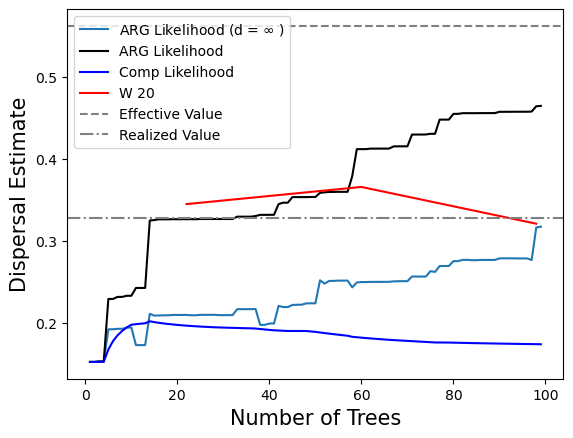

In [13]:
%matplotlib inline

dispersal_rates = np.loadtxt('slim_0.25rep0_Supl_DispersalRate.txt')

w20 = dispersal_rates[21:,-2] 
w20_disjoint = w20[::38]
w20_comp = [ np.average(w20_disjoint[:i+1]) for i in range(len(w20_disjoint)) ]
w20_x = dispersal_rates[21:,0][::38] 


plt.plot(dispersal_rates[:,0],dispersal_rates[:,6], label = 'ARG Likelihood (d = $\infty$ )')

plt.plot(dispersal_rates[:,0], dispersal_rates[:,2], color='black', label = "ARG Likelihood")
plt.plot(dispersal_rates[:,0], dispersal_rates[:,4], color = 'blue', label = "Comp Likelihood")
plt.plot(w20_x, w20_comp, color = 'red', label = "W 20")

plt.axhline(y=0.25**2+0.5,label = "Effective Value", linestyle = '--', color = 'grey')
plt.axhline(y=disp_x,label = "Realized Value", linestyle = '-.', color = 'grey')

plt.legend()
plt.xlabel("Number of Trees", fontsize = 15)
plt.ylabel("Dispersal Estimate", fontsize = 15)
plt.show()

